In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('diabetes.csv')
len(df)

768

In [4]:
sample = df.sample(frac=0.05)
len(sample)

38

In [5]:
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
683,4,125,80,0,0,32.3,0.536,27,1
451,2,134,70,0,0,28.9,0.542,23,1
30,5,109,75,26,0,36.0,0.546,60,0
426,0,94,0,0,0,0.0,0.256,25,0
702,1,168,88,29,0,35.0,0.905,52,1
407,0,101,62,0,0,21.9,0.336,25,0
251,2,129,84,0,0,28.0,0.284,27,0
421,2,94,68,18,76,26.0,0.561,21,0
296,2,146,70,38,360,28.0,0.337,29,1
374,2,122,52,43,158,36.2,0.816,28,0


In [6]:
df.isnull().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

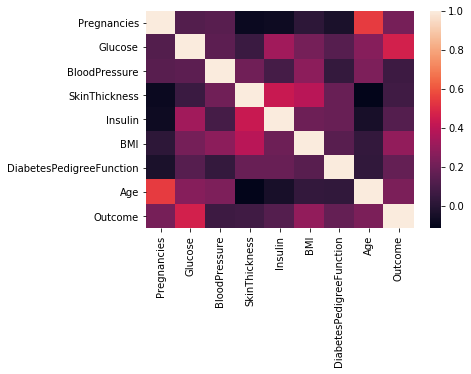

In [8]:
corr = df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)

In [9]:
df.BMI.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [10]:
sample.BMI.describe()

count    38.000000
mean     31.371053
std       7.655343
min       0.000000
25%      27.700000
50%      31.950000
75%      35.950000
max      45.600000
Name: BMI, dtype: float64

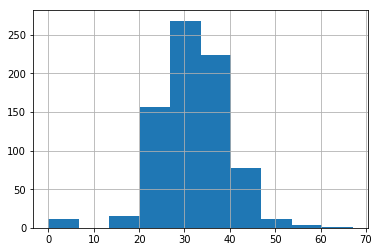

In [12]:
#binning
df.BMI.sort_values().hist(bins=10)

In [13]:
#cut into five equal-width bins
bins = pd.cut(df.BMI,5)
bins.head()

0    (26.84, 40.26]
1    (13.42, 26.84]
2    (13.42, 26.84]
3    (26.84, 40.26]
4    (40.26, 53.68]
Name: BMI, dtype: category
Categories (5, interval[float64]): [(-0.0671, 13.42] < (13.42, 26.84] < (26.84, 40.26] < (40.26, 53.68] < (53.68, 67.1]]

In [14]:
bins = pd.qcut(df.BMI,[0,0.25,0.5,0.75,1])
bins.head()

0      (32.0, 36.6]
1    (-0.001, 27.3]
2    (-0.001, 27.3]
3      (27.3, 32.0]
4      (36.6, 67.1]
Name: BMI, dtype: category
Categories (4, interval[float64]): [(-0.001, 27.3] < (27.3, 32.0] < (32.0, 36.6] < (36.6, 67.1]]

In [15]:
high_bmi = df['BMI'] > 30
high_bmi.value_counts()

True     465
False    303
Name: BMI, dtype: int64

In [17]:
df[~high_bmi]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0
14,5,166,72,19,175,25.8,0.587,51,1
15,7,100,0,0,0,30.0,0.484,32,1
17,7,107,74,0,0,29.6,0.254,31,1
23,9,119,80,35,0,29.0,0.263,29,1


In [18]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
data_list = [200,300,400,600,1000]
datadf = pd.DataFrame(data_list)

min_max_scaler = preprocessing.MinMaxScaler()

data_scaled = min_max_scaler.fit_transform(datadf)
final_datadf = pd.DataFrame(data_scaled)
final_datadf.index = data_list
final_datadf

,0
200,0.000
300,0.125
400,0.250
600,0.500
1000,1.000
